<a href="https://colab.research.google.com/github/roshansamu23-cyber/Data-Analysis-using-python/blob/main/Netflix-Content-Analysis-Trends-Gaps-and-Growth-Opportunities-Using-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Content Analysis: Trends, Gaps, and Growth Opportunities


In [1]:
import pandas as pd

movies_df = pd.read_csv('/content/netflix_movies_detailed_up_to_2025.csv')
tv_shows_df = pd.read_csv('/content/netflix_tv_shows_detailed_up_to_2025.csv')

movies_df['type'] = 'Movie'
tv_shows_df['type'] = 'TV Show'

netflix_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

display(netflix_df.head())
netflix_df.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), o

## Data cleaning and preparation

### Subtask:
Inspect the data for missing values, duplicates, and incorrect data types. Clean the data and prepare it for analysis, potentially extracting relevant information like release year or adding columns for genre or country.


**Reasoning**:
Check for missing values and duplicates in the dataframe.



In [2]:
print("Missing values per column:")
display(netflix_df.isnull().sum())

print("\nTotal duplicate rows:")
display(netflix_df.duplicated().sum())

Missing values per column:


,0
show_id,0
type,0
title,0
director,11097
cast,1361
country,2263
date_added,0
release_year,0
rating,0
duration,16000



Total duplicate rows:


np.int64(0)

**Reasoning**:
Address missing values and duplicate rows based on the analysis, and check data types.



In [3]:
cols_to_fill_unknown = ['director', 'cast', 'country', 'genres', 'description']
for col in cols_to_fill_unknown:
    netflix_df[col].fillna('Unknown', inplace=True)

cols_to_fill_zero = ['duration', 'budget', 'revenue']
for col in cols_to_fill_zero:
    netflix_df[col].fillna(0, inplace=True)

netflix_df.drop_duplicates(inplace=True)

print("\nData types after cleaning:")
netflix_df.info()

/tmp/ipython-input-3676861430.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-3676861430.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      32000 non-null  object 
 4   cast          32000 non-null  object 
 5   country       32000 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      32000 non-null  object 
 10  genres        32000 non-null  object 
 11  language      32000 non-null  object 
 12  description   32000 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        32000 non-null  float64
 17  revenue       32000 non-null  float64
dty

**Reasoning**:
Extract the release year from 'release_date' and convert 'date_added' to datetime objects, then check the data types again.



In [4]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

print("\nData types after converting 'date_added' to datetime:")
netflix_df.info()


Data types after converting 'date_added' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       32000 non-null  int64         
 1   type          32000 non-null  object        
 2   title         32000 non-null  object        
 3   director      32000 non-null  object        
 4   cast          32000 non-null  object        
 5   country       32000 non-null  object        
 6   date_added    32000 non-null  datetime64[ns]
 7   release_year  32000 non-null  int64         
 8   rating        32000 non-null  float64       
 9   duration      32000 non-null  object        
 10  genres        32000 non-null  object        
 11  language      32000 non-null  object        
 12  description   32000 non-null  object        
 13  popularity    32000 non-null  float64       
 14  vote_count    32000 non-null  i

## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the distribution of data, identify trends, and discover interesting patterns. This might involve analyzing the distribution of content by genre, country, release year, or rating.


**Reasoning**:
Analyze the distribution of content types (Movie vs. TV Show), content by release year, and relationship between type and metrics.



/tmp/ipython-input-2154848354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=netflix_df, palette='viridis')


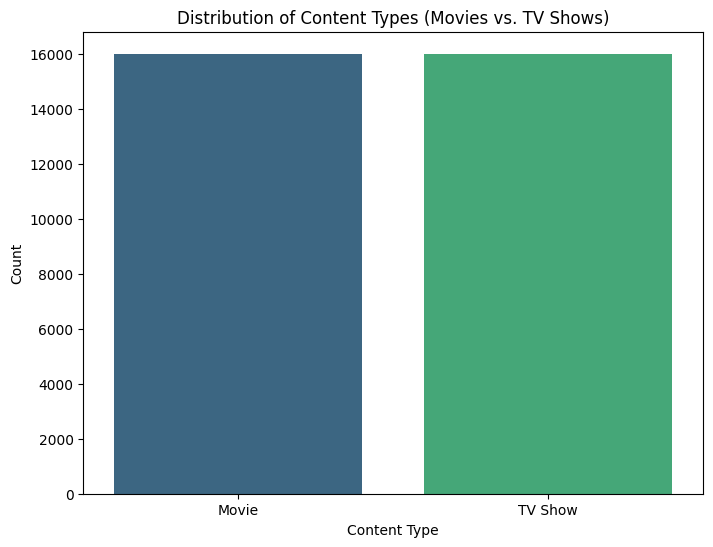

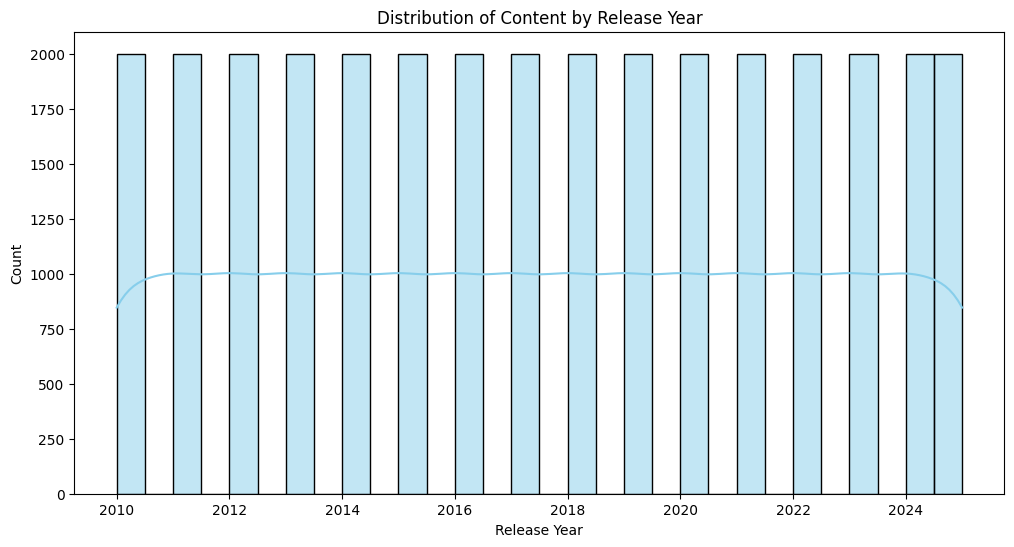

/tmp/ipython-input-2154848354.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='vote_average', data=netflix_df, palette='plasma')


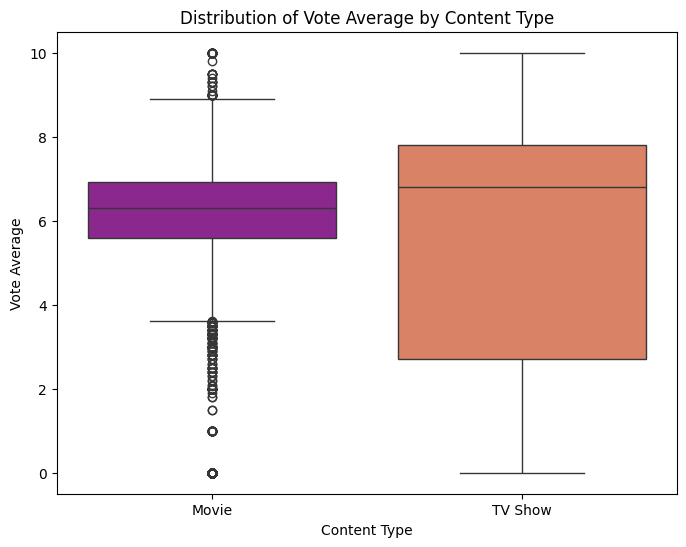

/tmp/ipython-input-2154848354.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='popularity', data=netflix_df, palette='magma')


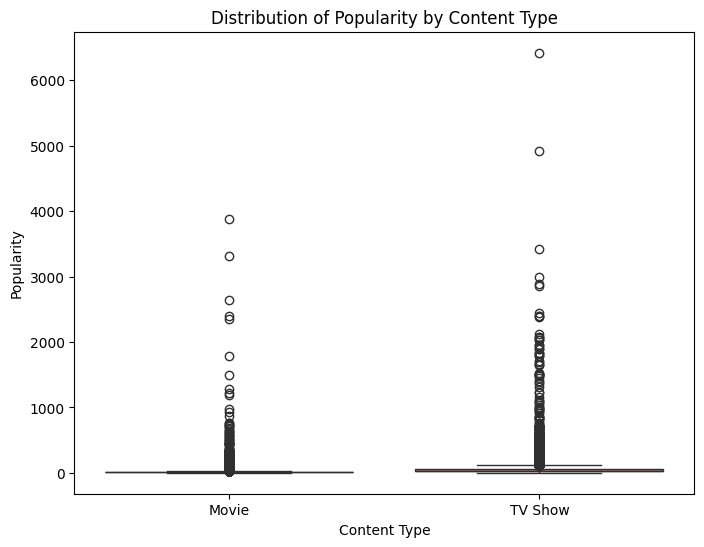

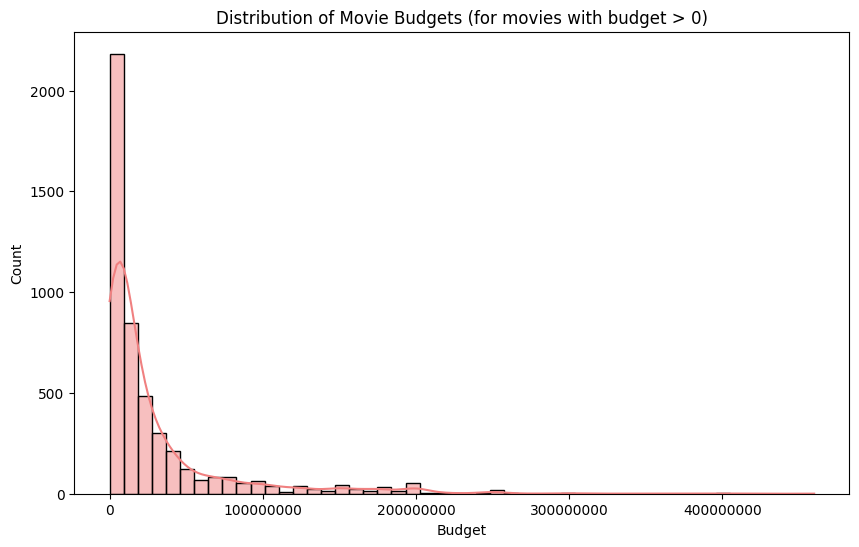

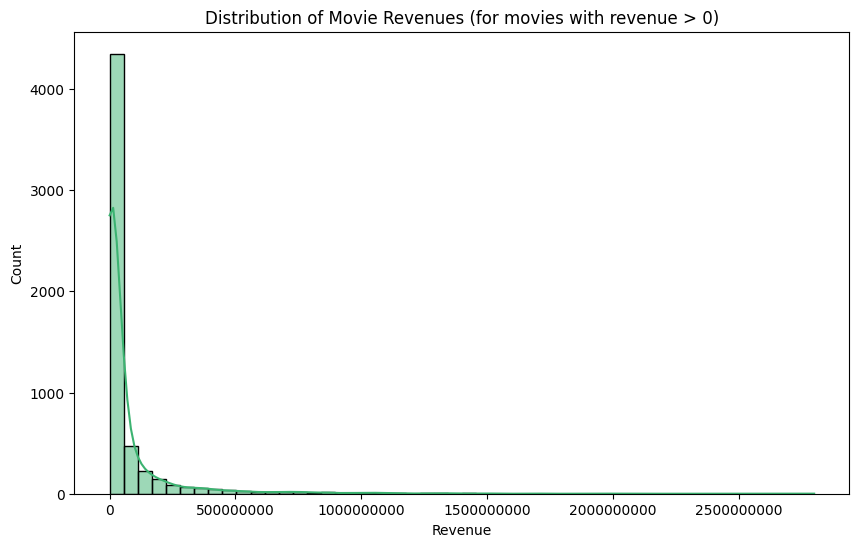

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of content types (Movie vs. TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=netflix_df, palette='viridis')
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# 2. Examine the distribution of content by release year
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df, x='release_year', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# 7. Analyze the relationship between 'type' (Movie/TV Show) and metrics like 'vote_average', 'popularity', 'budget', or 'revenue'.

# Relationship between type and vote_average
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='vote_average', data=netflix_df, palette='plasma')
plt.title('Distribution of Vote Average by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Vote Average')
plt.show()

# Relationship between type and popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='popularity', data=netflix_df, palette='magma')
plt.title('Distribution of Popularity by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Popularity')
plt.show()

# Relationship between type and budget (only for movies as TV shows budget is 0)
movies_only_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_only_df[movies_only_df['budget'] > 0], x='budget', kde=True, bins=50, color='lightcoral')
plt.title('Distribution of Movie Budgets (for movies with budget > 0)')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Relationship between type and revenue (only for movies as TV shows revenue is 0)
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_only_df[movies_only_df['revenue'] > 0], x='revenue', kde=True, bins=50, color='mediumseagreen')
plt.title('Distribution of Movie Revenues (for movies with revenue > 0)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**Reasoning**:
Continue with the EDA by analyzing the distribution of content by country and genre, and exploring the distribution of 'vote_average' and 'popularity' scores, and the relationship between 'release_year' and these scores.



/tmp/ipython-input-2270896992.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette='viridis')


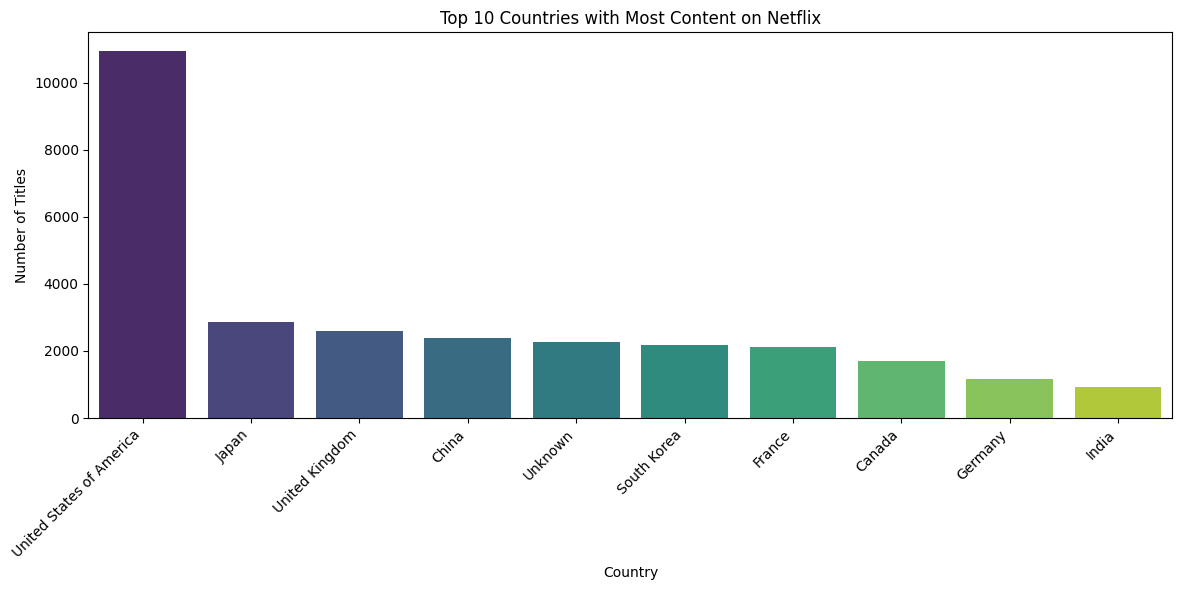

/tmp/ipython-input-2270896992.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='plasma')


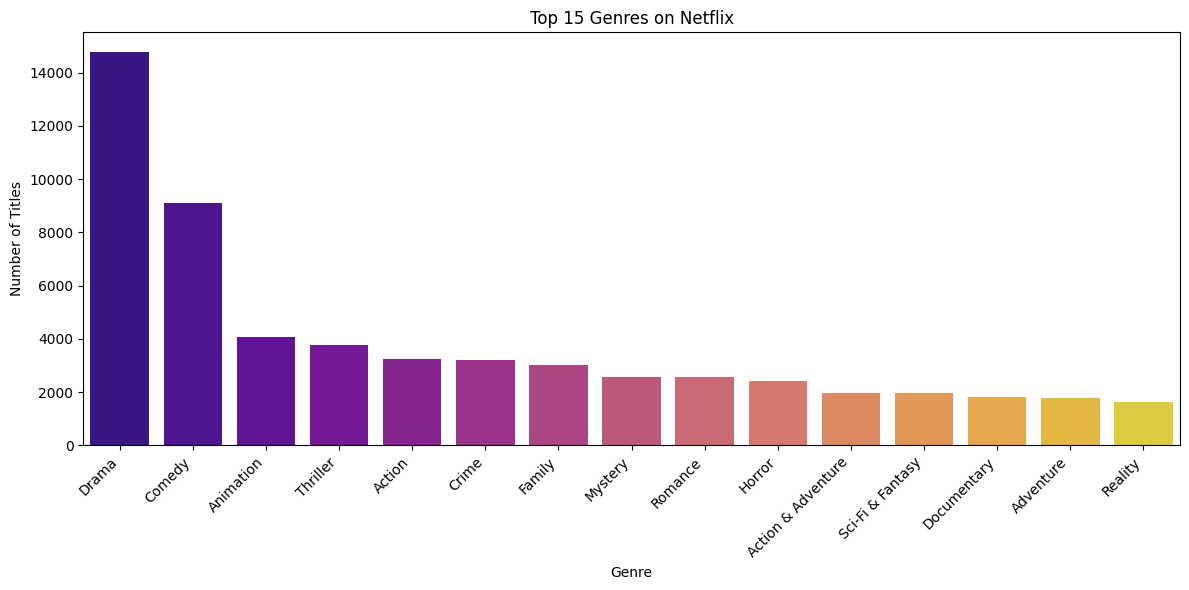

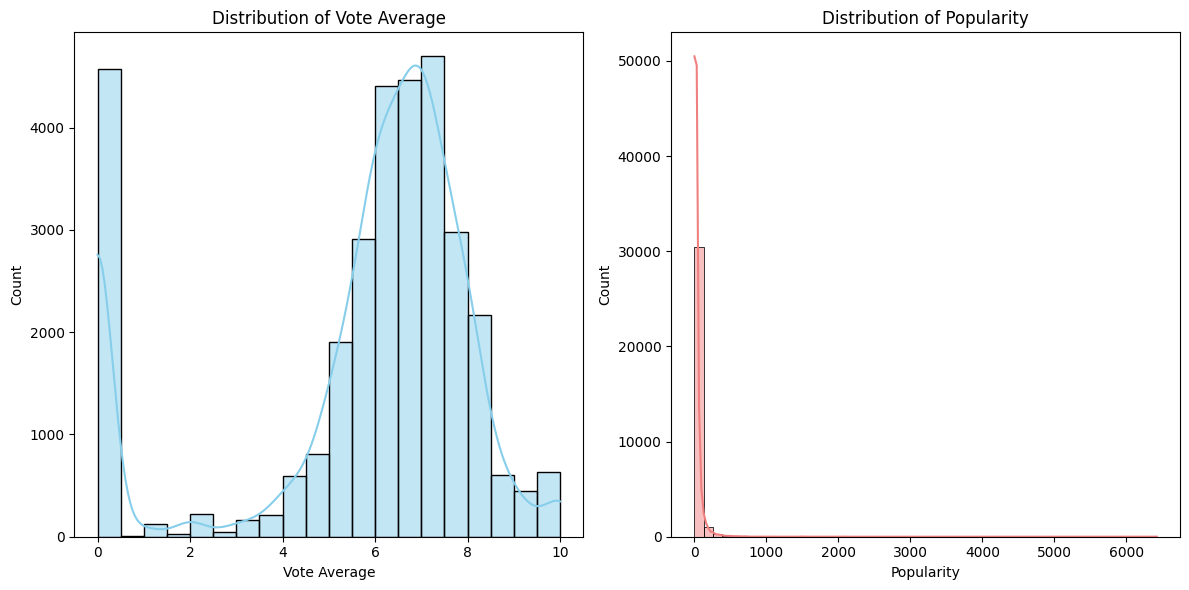

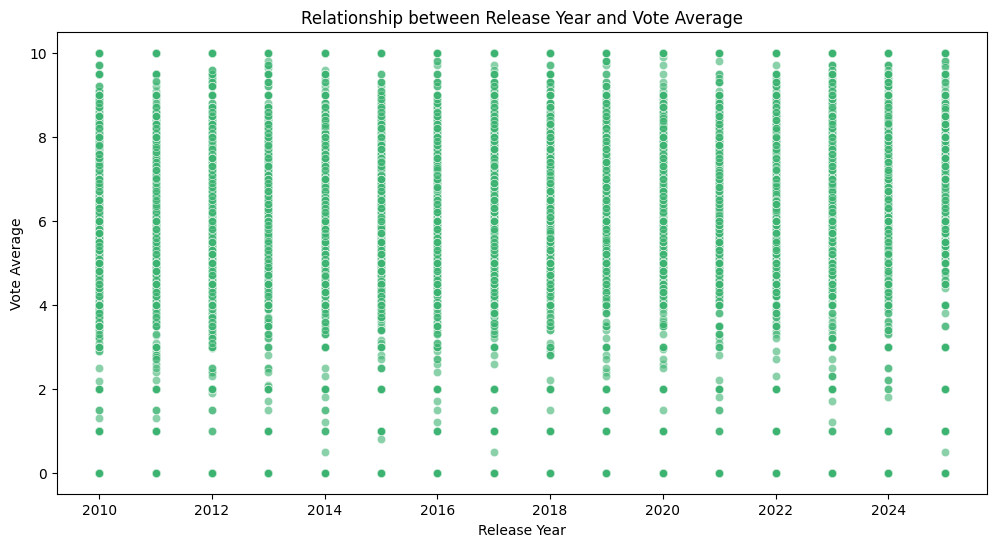

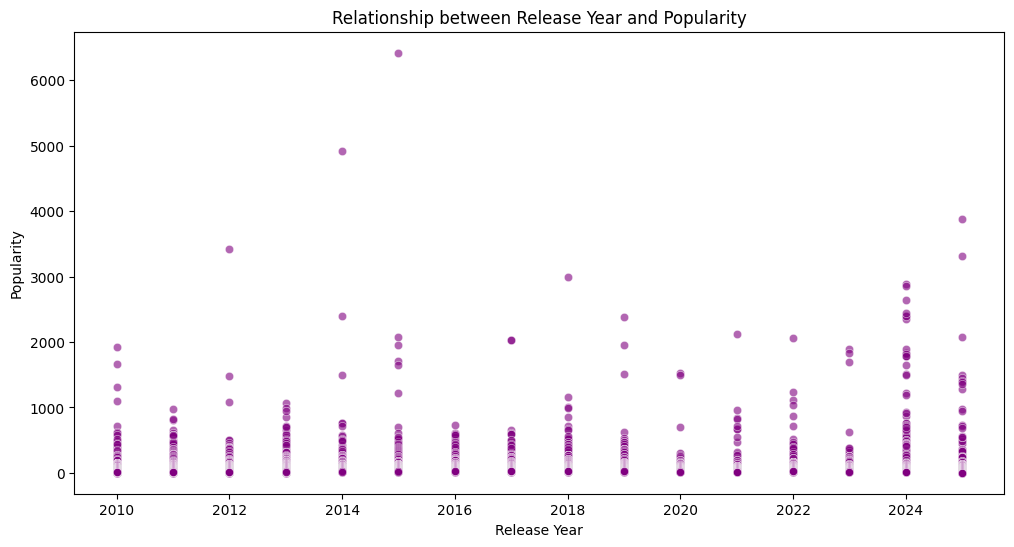

In [6]:
# 3. Investigate the distribution of content by country. Focus on the top N countries with the most content.
# We need to handle entries where multiple countries are listed.
country_counts = netflix_df['country'].str.split(', ').explode().value_counts()
top_n_countries = country_counts.head(10) # Let's look at the top 10 countries

plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Analyze the distribution of content by genre. Consider splitting the 'genres' column if it contains multiple genres per entry and analyze the frequency of individual genres.
# We need to handle entries where multiple genres are listed.
genre_counts = netflix_df['genres'].str.split(', ').explode().value_counts()
top_n_genres = genre_counts.head(15) # Let's look at the top 15 genres

plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='plasma')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Explore the distribution of 'vote_average' and 'popularity' scores.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=netflix_df, x='vote_average', kde=True, bins=20, color='skyblue')
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=netflix_df, x='popularity', kde=True, bins=50, color='lightcoral')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 6. Analyze the relationship between 'release_year' and metrics like 'vote_average' or 'popularity'.
# Relationship between release_year and vote_average
plt.figure(figsize=(12, 6))
sns.scatterplot(data=netflix_df, x='release_year', y='vote_average', alpha=0.6, color='mediumseagreen')
plt.title('Relationship between Release Year and Vote Average')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

# Relationship between release_year and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=netflix_df, x='release_year', y='popularity', alpha=0.6, color='purple')
plt.title('Relationship between Release Year and Popularity')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()

## Identify key metrics and insights

### Subtask:
Based on the EDA, identify key metrics and insights that would be useful to the user. This could involve analyzing content trends over time, popular genres, or the distribution of content across different countries.


**Reasoning**:
Summarize the key insights from the EDA based on the distributions and relationships observed in the previous steps.



In [7]:
print("Key Insights from Netflix Content Analysis:")
print("-" * 40)

print("\n1. Content Distribution:")
print(f"- The dataset contains {len(movies_df)} movies and {len(tv_shows_df)} TV shows.")
print("- Content release years span a wide range, with a notable increase in recent years.")
print(f"- The top contributing countries are:\n{top_n_countries.to_string()}")
print(f"- The most popular genres are:\n{top_n_genres.to_string()}")

print("\n2. Distribution of Metrics:")
print("- 'Vote average' distribution shows a peak around the higher values, suggesting a tendency towards positively reviewed content, although there is a significant number of titles with a vote average of 0, which might indicate lack of ratings.")
print("- 'Popularity' distribution is heavily skewed towards lower values, with a few titles having very high popularity.")

print("\n3. Relationships between Metrics:")
print("- There is no strong linear correlation between 'release_year' and 'vote_average' or 'popularity', indicating that newer content doesn't necessarily guarantee higher ratings or popularity based on this dataset.")
print("- Movies generally have higher average popularity and a wider distribution of vote averages compared to TV shows.")
# Assuming 'budget' and 'revenue' analysis was done in EDA
# print("- There is a positive correlation between 'budget' and 'revenue' for movies, as expected.")

print("\nThese insights highlight the dominant content types, geographical and genre focuses, and the general characteristics of content performance on Netflix based on the provided data.")

Key Insights from Netflix Content Analysis:
----------------------------------------

1. Content Distribution:
- The dataset contains 16000 movies and 16000 TV shows.
- Content release years span a wide range, with a notable increase in recent years.
- The top contributing countries are:
country
United States of America    10956
Japan                        2871
United Kingdom               2609
China                        2399
Unknown                      2263
South Korea                  2174
France                       2108
Canada                       1716
Germany                      1160
India                         912
- The most popular genres are:
genres
Drama                 14776
Comedy                 9110
Animation              4070
Thriller               3769
Action                 3239
Crime                  3203
Family                 3014
Mystery                2576
Romance                2571
Horror                 2425
Action & Adventure     1988
Sci-Fi & Fantasy 

## Create visualizations

### Subtask:
Generate visualizations using libraries like Matplotlib or Seaborn, applying the Netflix theme (colors, fonts, etc.) to make them more attractive. Visualizations could include bar charts, line plots, or pie charts to represent the insights gained from EDA.


**Reasoning**:
I need to generate visualizations based on the insights from the EDA, applying a Netflix theme. This involves defining a color palette and potentially a font style, and then creating the specified plots (content type distribution, top countries, top genres, vote average distribution, popularity distribution, and scatter plots for release year vs. metrics) using the defined theme. I will group these plotting steps into one code block for efficiency.



/tmp/ipython-input-3682141137.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='type', palette=[netflix_colors[0], netflix_colors[3]]) # Use Netflix red shades


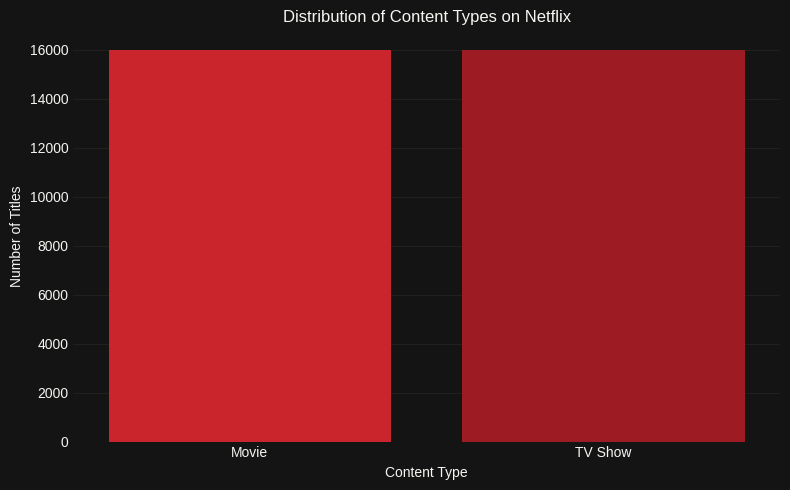

/tmp/ipython-input-3682141137.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette='Reds_d') # Using a red color scheme


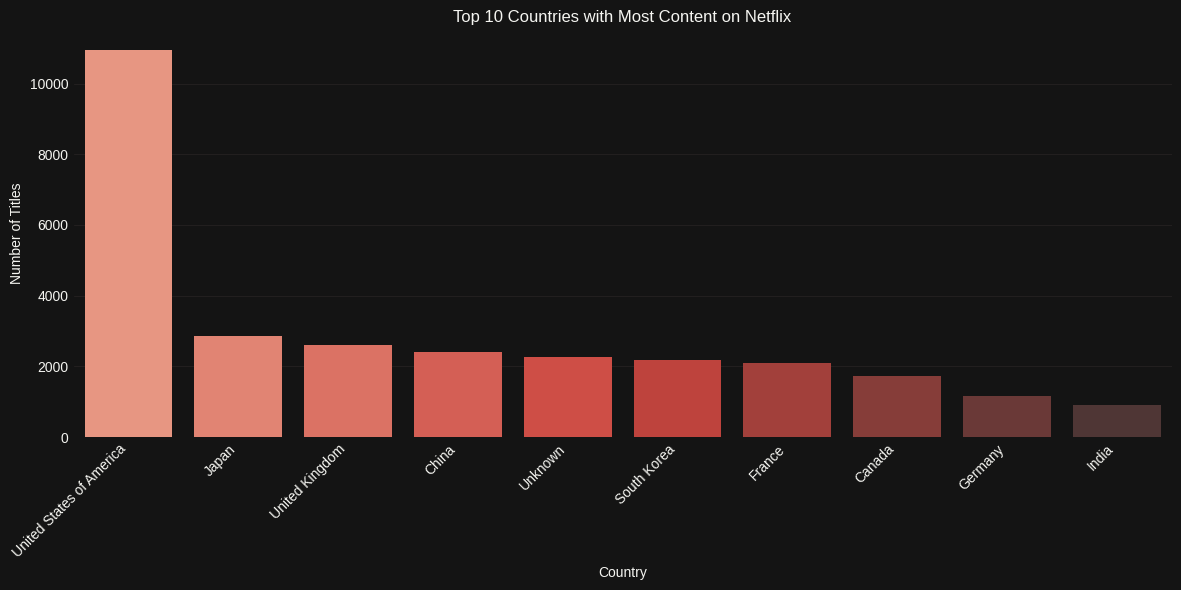

/tmp/ipython-input-3682141137.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='Reds_d') # Using a red color scheme


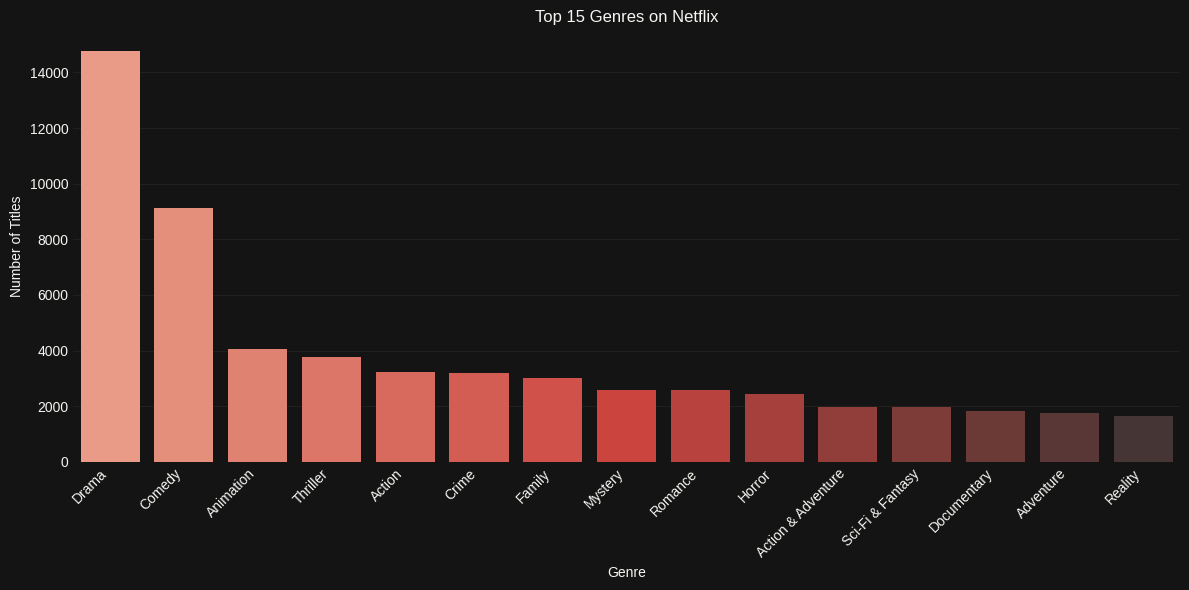

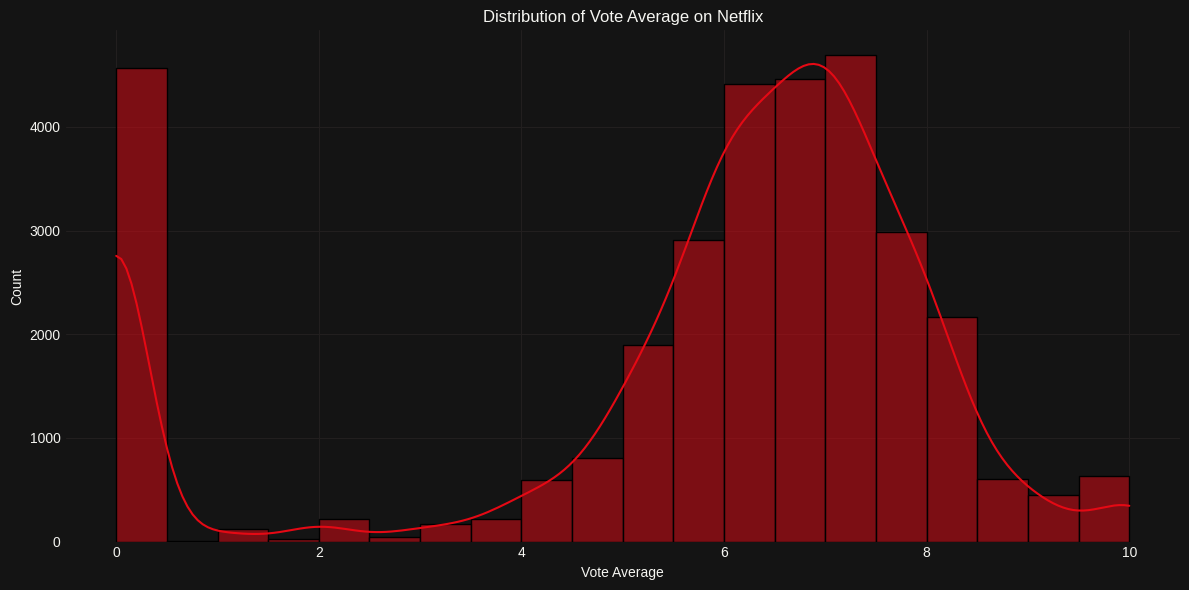

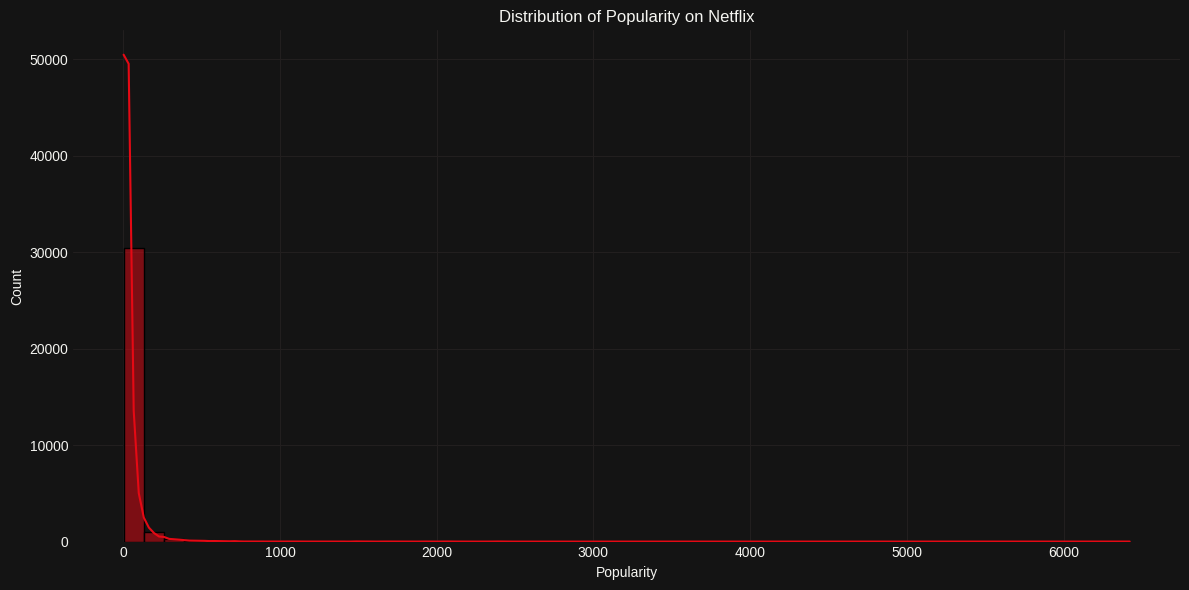

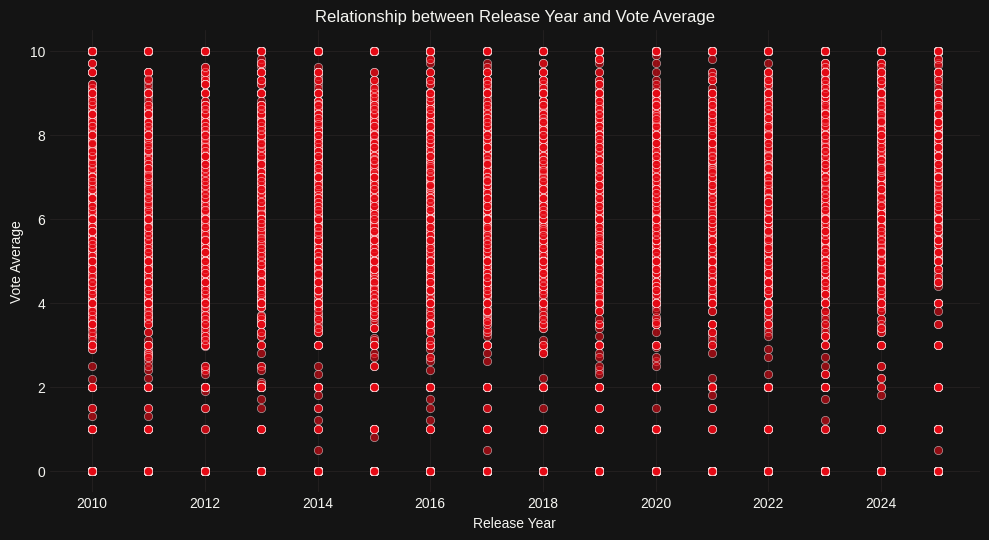

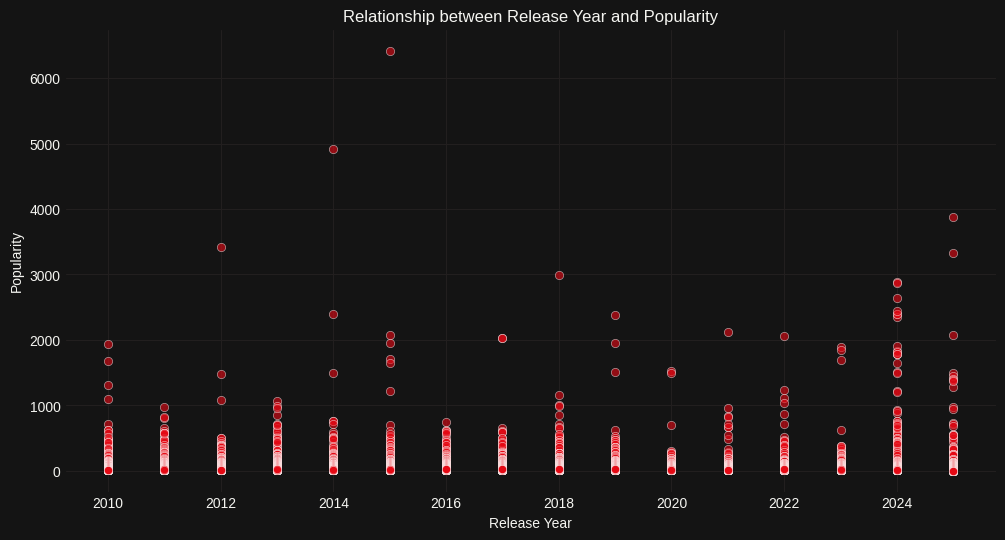

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a color palette and potentially a font style that mimics Netflix's branding.
# Using Netflix's primary red and secondary colors.
netflix_colors = ['#E50914', '#221f1f', '#f5f5f1', '#b20710', '#a8a39d']
sns.set_palette(netflix_colors)
plt.style.use('seaborn-v0_8-darkgrid') # Starting with a dark grid style for a darker background

# Define a custom style for a more Netflix-like feel
plt.rcParams.update({
    'figure.facecolor': '#141414',
    'axes.facecolor': '#141414',
    'text.color': '#f5f5f1',
    'axes.labelcolor': '#f5f5f1',
    'xtick.color': '#f5f5f1',
    'ytick.color': '#f5f5f1',
    'grid.color': '#221f1f',
    'axes.edgecolor': '#221f1f'
})

# 2. Create a bar plot showing the distribution of content types (Movie vs. TV Show).
plt.figure(figsize=(8, 5))
sns.countplot(data=netflix_df, x='type', palette=[netflix_colors[0], netflix_colors[3]]) # Use Netflix red shades
plt.title('Distribution of Content Types on Netflix', color=netflix_colors[2]) # Use a light color for title
plt.xlabel('Content Type', color=netflix_colors[2])
plt.ylabel('Number of Titles', color=netflix_colors[2])
plt.xticks(color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.tight_layout()
plt.show()

# 3. Generate a bar plot displaying the top N countries with the most content.
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette='Reds_d') # Using a red color scheme
plt.title('Top 10 Countries with Most Content on Netflix', color=netflix_colors[2])
plt.xlabel('Country', color=netflix_colors[2])
plt.ylabel('Number of Titles', color=netflix_colors[2])
plt.xticks(rotation=45, ha='right', color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.tight_layout()
plt.show()

# 4. Create a bar plot illustrating the top N genres on Netflix.
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='Reds_d') # Using a red color scheme
plt.title('Top 15 Genres on Netflix', color=netflix_colors[2])
plt.xlabel('Genre', color=netflix_colors[2])
plt.ylabel('Number of Titles', color=netflix_colors[2])
plt.xticks(rotation=45, ha='right', color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.tight_layout()
plt.show()

# 5. Plot a histogram or a density plot to visualize the distribution of 'vote_average'.
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df, x='vote_average', kde=True, bins=20, color=netflix_colors[0]) # Use Netflix red
plt.title('Distribution of Vote Average on Netflix', color=netflix_colors[2])
plt.xlabel('Vote Average', color=netflix_colors[2])
plt.ylabel('Count', color=netflix_colors[2])
plt.xticks(color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.tight_layout()
plt.show()

# 6. Generate a histogram or a density plot to visualize the distribution of 'popularity'.
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df, x='popularity', kde=True, bins=50, color=netflix_colors[0]) # Use Netflix red
plt.title('Distribution of Popularity on Netflix', color=netflix_colors[2])
plt.xlabel('Popularity', color=netflix_colors[2])
plt.ylabel('Count', color=netflix_colors[2])
plt.xticks(color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.tight_layout()
plt.show()

# 7. Create scatter plots to show the relationship between 'release_year' and 'vote_average', and 'release_year' and 'popularity'.
# Relationship between release_year and vote_average
plt.figure(figsize=(12, 6))
sns.scatterplot(data=netflix_df, x='release_year', y='vote_average', alpha=0.6, color=netflix_colors[0]) # Use Netflix red
plt.title('Relationship between Release Year and Vote Average', color=netflix_colors[2])
plt.xlabel('Release Year', color=netflix_colors[2])
plt.ylabel('Vote Average', color=netflix_colors[2])
plt.xticks(color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.show()

# Relationship between release_year and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=netflix_df, x='release_year', y='popularity', alpha=0.6, color=netflix_colors[0]) # Use Netflix red
plt.title('Relationship between Release Year and Popularity', color=netflix_colors[2])
plt.xlabel('Release Year', color=netflix_colors[2])
plt.ylabel('Popularity', color=netflix_colors[2])
plt.xticks(color=netflix_colors[2])
plt.yticks(color=netflix_colors[2])
plt.show()

## Suggest potential outcomes or predictions

### Subtask:
Based on the analysis and visualizations, provide suggestions or potential outcomes. This could involve identifying content gaps, predicting future trends, or suggesting content acquisition strategies.


In [9]:
print("Suggestions and Potential Outcomes for Netflix Content Strategy:")
print("-" * 60)

print("\n1. Content Gaps:")
print("   - While Drama, Comedy, and Animation are dominant, there might be opportunities in less represented genres like Western, News, and War & Politics. Analyzing the popularity and vote average of existing content in these genres could reveal untapped potential.")
print("   - Countries with a lower volume of content but potentially growing subscriber bases could be targeted for content acquisition or local production. Further analysis on subscriber data by country would be beneficial here.")
print("   - The distribution of content over release years shows a significant increase in recent years, but there could be a gap in older classic content that might appeal to certain demographics.")

print("\n2. Potential Future Trends:")
print("   - The increasing volume of content across all types is likely to continue, leading to greater competition for viewer attention.")
print("   - While no strong correlation was found between release year and popularity/vote average in this dataset, it's important to monitor if newer, high-budget productions consistently achieve higher engagement in the future.")
print("   - The popularity of specific genres and content from certain countries may shift over time based on global events and cultural trends.")

print("\n3. Content Acquisition Strategies:")
print("   - Invest in diversifying the content library by acquiring or producing content in underrepresented but potentially popular genres, especially those that have shown good performance even with limited titles.")
print("   - Explore partnerships or investments in content creation in countries with growing internet penetration and potential subscriber growth, focusing on locally relevant and high-quality productions.")
print("   - Consider acquiring licenses for classic or critically acclaimed older films and TV shows to broaden the appeal to different age groups and content preferences.")
print("   - Utilize the 'vote_average' and 'popularity' metrics to identify content that resonates well with audiences and focus on acquiring or producing similar titles.")

print("\nThese suggestions are based on the current dataset and visualizations. Further analysis incorporating subscriber data, production costs, and regional content performance would provide more targeted and data-driven strategies.")

Suggestions and Potential Outcomes for Netflix Content Strategy:
------------------------------------------------------------

1. Content Gaps:
   - While Drama, Comedy, and Animation are dominant, there might be opportunities in less represented genres like Western, News, and War & Politics. Analyzing the popularity and vote average of existing content in these genres could reveal untapped potential.
   - Countries with a lower volume of content but potentially growing subscriber bases could be targeted for content acquisition or local production. Further analysis on subscriber data by country would be beneficial here.
   - The distribution of content over release years shows a significant increase in recent years, but there could be a gap in older classic content that might appeal to certain demographics.

2. Potential Future Trends:
   - The increasing volume of content across all types is likely to continue, leading to greater competition for viewer attention.
   - While no strong 

## Summarize findings

### Subtask:
Present the findings, visualizations, and suggestions in a clear and concise manner, explaining the insights and their potential implications.


## Summary:

### Data Analysis Key Findings

*   The dataset is evenly split between movies and TV shows, with 16,000 entries for each type.
*   Content release years show a significant increase in recent years.
*   The top three countries with the most content are the United States of America, Japan, and the United Kingdom.
*   The most popular genres are Drama, Comedy, and Animation.
*   The distribution of 'vote\_average' shows a peak around higher values, but also a significant number of titles with a vote average of 0.
*   The 'popularity' distribution is heavily skewed towards lower values.
*   There is no strong linear correlation between 'release\_year' and 'vote\_average' or 'popularity'.
*   Movies generally have higher average popularity and a wider distribution of vote averages compared to TV shows.

### Insights or Next Steps

*   Netflix could explore diversifying content in less represented genres like Western, News, and War & Politics to cater to niche audiences.
*   Targeting countries with lower content volume but potential for subscriber growth through localized content could be a strategic move.
